In [4]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm, probplot
import statsmodels.api as sm
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')

In [4]:
#lendo informação obtida no site coinmarketcap.com
#current = pd.read_json('https://api.coinmarketcap.com/v1/ticker/') 
cmc_2017 = pd.read_csv("coinmarketcap_06122017.csv")
#imprimindo as primeiras linhas do dataset
cmc_2017.head(10)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10
5,5,2.289430e+08,7.736420e+06,dash,1512549542,5.794076e+09,1.890000e+07,Dash,1.22,-3.31,10.64,0.059856,748.935000,6,DASH,7.736420e+06
6,6,4.093420e+08,5.415391e+07,litecoin,1512549542,5.634498e+09,8.400000e+07,Litecoin,-0.17,0.80,3.68,0.008316,104.046000,7,LTC,5.415391e+07
7,7,1.384070e+08,1.669097e+07,bitcoin-gold,1512549582,4.920065e+09,2.100000e+07,Bitcoin Gold,-0.86,-8.65,-11.24,0.023559,294.774000,8,BTG,1.679097e+07
8,8,5.498600e+08,1.544296e+07,monero,1512549544,4.331688e+09,NaN,Monero,-2.00,25.65,41.23,0.022418,280.496000,9,XMR,1.544296e+07
9,9,6.164750e+07,2.592707e+10,cardano,1512549579,3.231420e+09,4.500000e+10,Cardano,-0.28,-5.80,-8.25,0.000010,0.124635,10,ADA,3.111248e+10


In [5]:
#realizando os mesmos passos feitos acima para 2018
cmc_2018 = pd.read_csv("coinmarketcap_06012018.csv")
cmc_2018.head(10)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,22081300000,16785225,bitcoin,1515230661,284909052105,2.100000e+07,Bitcoin,-0.42,5.76,26.04,1.000000,16973.800000,1,BTC,16785225
1,1,5221370000,38739144847,ripple,1515230641,119207709132,1.000000e+11,Ripple,-0.26,-9.23,24.15,0.000186,3.077190,2,XRP,99993093880
2,2,5705690000,96803840,ethereum,1515230649,100115499075,NaN,Ethereum,0.29,-1.04,45.01,0.062517,1034.210000,3,ETH,96803840
3,3,1569900000,16896225,bitcoin-cash,1515230652,44424061657,2.100000e+07,Bitcoin Cash,0.03,7.99,2.81,0.158934,2629.230000,4,BCH,16896225
4,4,428305000,25927070538,cardano,1515230654,25916647856,4.500000e+10,Cardano,0.39,-5.87,64.99,0.000060,0.999598,5,ADA,31112483745
5,5,2105240000,54637708,litecoin,1515230641,16574020942,8.400000e+07,Litecoin,2.31,22.26,32.85,0.018337,303.344000,6,LTC,54637708
6,6,146039000,8999999999,nem,1515230644,14813369998,NaN,NEM,-1.82,-2.53,69.65,0.000099,1.645930,7,XEM,8999999999
7,7,656389000,17877794558,stellar,1515230643,12634630726,NaN,Stellar,1.58,-4.94,110.28,0.000043,0.706722,8,XLM,103570548975
8,8,2971610000,65748192475,tron,1515230654,11741640953,NaN,TRON,-1.80,-12.63,434.36,0.000011,0.178585,9,TRX,100000000000
9,9,194039000,2779530283,iota,1515230652,11143859582,2.779530e+09,IOTA,-3.03,0.89,19.45,0.000242,4.009260,10,MIOTA,2779530283


In [6]:
# #juntando ambos os datasets --> NAO FAZ MUITO SENTIDO
# cmc = pd.merge(cmc_2017,cmc_2018,on="")
# cmc.head()

In [7]:
#listando as colunas do dataset
list(cmc_2017)

['Unnamed: 0',
 '24h_volume_usd',
 'available_supply',
 'id',
 'last_updated',
 'market_cap_usd',
 'max_supply',
 'name',
 'percent_change_1h',
 'percent_change_24h',
 'percent_change_7d',
 'price_btc',
 'price_usd',
 'rank',
 'symbol',
 'total_supply']

In [8]:
# cmc_2017["name"].value_counts(True)*100

In [9]:
# dfc = cmc_2017["name"].value_counts()
# dfc.plot(kind='bar', legend=False)
# GRAFICO ABSURDAMENTE PESADO

In [10]:
# Selecionando as colunas 'name' e 'market_cap_usd'
market_cap_2017 = cmc_2017[['name', 'market_cap_usd']]
market_cap_2018 = cmc_2018[['name', 'market_cap_usd']]

# Contando o número de valores de cada uma delas
market_cap_2017.count()

name              1326
market_cap_usd    1031
dtype: int64

nota-se que há mais ids que market caps!

In [11]:
# Filtrando as linhas sem um market capitalization
# market_cap = market_cap.query('market_cap_usd > 0')
market_cap_2017 = market_cap_2017[market_cap_2017["market_cap_usd"]>0]
market_cap_2018 = market_cap_2018[market_cap_2018["market_cap_usd"]>0]

# Contando o número de valores novamente
market_cap_2017.count()

name              1031
market_cap_usd    1031
dtype: int64

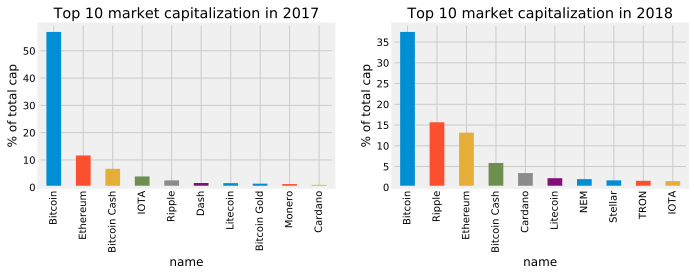

In [12]:
# Selecionando as 10 primeiras linhas e setando o index via nome da moeda
market_cap10_2017 = market_cap_2017.head(10).set_index('name')
market_cap10_2018 = market_cap_2018.head(10).set_index('name')

# Calculando porcentagem do market cap da moeda em relação ao total
market_cap10_2017 = market_cap10_2017.assign(market_cap_perc_2017 = lambda x: (x["market_cap_usd"] / market_cap_2017["market_cap_usd"].sum()) * 100)
market_cap10_2018 = market_cap10_2018.assign(market_cap_perc_2018 = lambda x: (x["market_cap_usd"] / market_cap_2018["market_cap_usd"].sum()) * 100)

# Plotando o gráfico de barras para analisar o tamanho que cada moeda tem no mercado de criptos
plt.figure(figsize=(16,3))
plt.subplot(131)
plot = market_cap10_2017.market_cap_perc_2017.plot.bar(title='Top 10 market capitalization in 2017')
plot.set_ylabel('% of total cap')

plt.subplot(132)
plot = market_cap10_2018.market_cap_perc_2018.plot.bar(title='Top 10 market capitalization in 2018')
plot.set_ylabel('% of total cap');

Se formos analisar as top 3 criptomoedas mais dominantes do mercado em ambos os anos, conseguimos perceber duas que foram recorrentes: BITCOIN E ETHEREUM.

In [5]:
# get market info for bitcoin from the start of 2016 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
bitcoin_market_info.columns = bitcoin_market_info.columns.str.replace("*", "")
# look at the first few rows
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-11-16,5645.32,5657.02,5498.94,5575.55,5279320000,96900828780
1,2018-11-15,5736.15,5774.82,5358.38,5648.03,7032140000,98151606541
2,2018-11-14,6351.24,6371.55,5544.09,5738.35,7398940000,99712077259
3,2018-11-13,6373.19,6395.27,6342.67,6359.49,4503800000,110494466204
4,2018-11-12,6411.76,6434.21,6360.47,6371.27,4295770000,110689666528


In [14]:
# get market info for ethereum from the start of 2016 to the current day
ethereum_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
ethereum_market_info = ethereum_market_info.assign(Date=pd.to_datetime(ethereum_market_info['Date']))
# when Volume is equal to '-' convert it to 0
# ethereum_market_info.loc[ethereum_market_info['Volume']=="-",'Volume']=0
# convert to int
ethereum_market_info['Volume'] = ethereum_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
ethereum_market_info.columns = ethereum_market_info.columns.str.replace("*", "")
# look at the first few rows
ethereum_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-11-16,180.87,181.35,173.13,175.18,2015330000,18086156169
1,2018-11-15,181.90,184.25,170.19,180.81,2638410000,18663659629
2,2018-11-14,206.53,207.04,174.08,181.40,2595330000,18721032761
3,2018-11-13,210.15,210.51,206.13,206.83,1610260000,21341261802
4,2018-11-12,211.51,212.62,208.92,210.42,1452380000,21707637540


In [15]:
bitcoin_market_info['Close'].describe()

count     2029.000000
mean      2273.433864
std       3444.690994
min         68.430000
25%        320.170000
50%        595.810000
75%       2552.450000
max      19497.400000
Name: Close, dtype: float64

In [16]:
#bitcoin_market_info['Volume'].describe()

In [17]:
ethereum_market_info['Close'].describe()

count    1198.000000
mean      214.298080
std       279.419622
min         0.434829
25%         9.922500
50%        44.500000
75%       329.055000
max      1396.420000
Name: Close, dtype: float64

In [18]:
#ethereum_market_info['Volume'].describe()

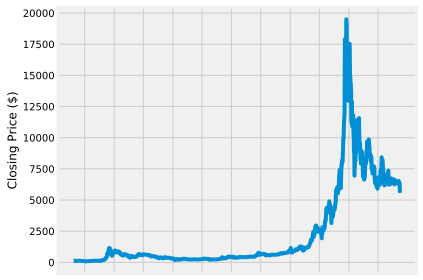

In [19]:
fig, ax1 = plt.subplots(1,1, gridspec_kw = {'height_ratios':[3]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['Close'])
fig.tight_layout()
plt.show()

In [7]:
Ouro = pd.read_excel('Preco.xlsx')
Ouro.head()

,Data,USD$
0,2000-01-03,290.25
1,2000-01-04,281.50
2,2000-01-05,280.45
3,2000-01-06,279.40
4,2000-01-07,282.10


In [27]:
# #Cruza as duas tabelas (bitcoin e ouro) via data
# bitcoin_market_info.set_index('Date', inplace=True)
# Ouro.set_index('Data', inplace=True)

# df = bitcoin_market_info.join(Ouro)#, how='inner', lsuffix='_btc', rsuffix='_income')

# #Seleciona o ano de 2010 e remove os NaNs
# df = df[['2010_co2','2010_income']].dropna()

# #Transforma a renda na escala de milhares de dólares
# df['2010_income'] /= 1000


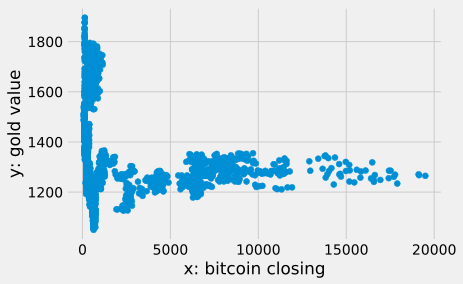

In [8]:
bitcoin = bitcoin_market_info[::-1]
x = bitcoin['Close'].values
y = Ouro['USD$'][((len(Ouro['Data']))-(len(bitcoin['Date']))):len(Ouro['Data'])].values
plt.scatter(x,y);
plt.xlabel("x: bitcoin closing");
plt.ylabel("y: gold value");

In [9]:
y_ = y.mean()
x_ = x.mean()

Sxy = ((x -x_)*(y -y_)).sum()
Sxx = ((x -x_)**2).sum()

b1 = Sxy/Sxx
b0 = y_ - b1*x_

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))


beta0: 1388.896561812009
beta1: -0.013587086035775894


In [10]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

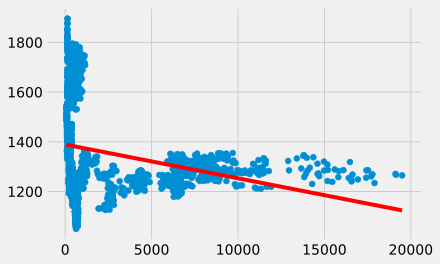

In [12]:
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados

In [13]:
ei = y - b0 
ei

array([ -57.39656181,  -51.89656181,  -60.89656181, ..., -158.94656181,
       -164.74656181, -177.49656181])

((array([-3.39626435, -3.14547844, -3.00639147, ...,  3.00639147,
          3.14547844,  3.39626435]),
  array([-339.49656181, -333.49656181, -333.44656181, ...,  488.60343819,
          506.10343819,  506.10343819])),
 (180.21078416515064, -30.88934150643971, 0.9434423879297411))

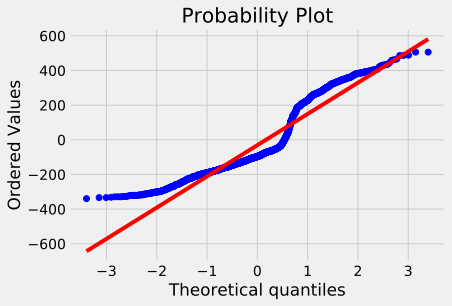

In [14]:
probplot(ei, dist = "norm", plot = plt)

In [15]:
xa = sm.add_constant(x)
model = sm.OLS(y,xa)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           3.41e-29
Time:                        22:00:36   Log-Likelihood:                -13470.
No. Observations:                2029   AIC:                         2.694e+04
Df Residuals:                    2027   BIC:                         2.696e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1388.8966      4.921    282.236      0.000    1379.246    1398.547
x1            -0.0136      0.001    -11.394      0.000      -0.016      -0.011
==============================================================================
Omnibus:                      157.317   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.030
Skew:                           0.603   Prob(JB):                     4.35e-33
Kurtosis:                       2.446   Cond. No.                     4.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

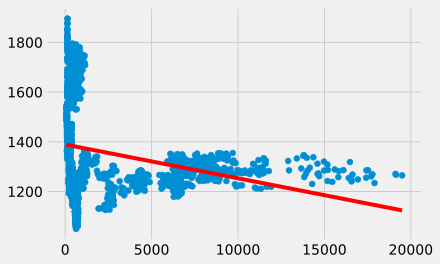

In [16]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);